Task 1

The Moons.py file contains the Moons class, which is instantiated below. 

In [80]:
from moons import Moons

test = Moons()

The Moons class contains the following attributes (also accessible via dir() function): data, grouped_data, names

In [81]:
dir(test)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'grouped_data',
 'names',
 'plot']

Within the .data attribute is a pandas DataFrame of the whole jupiter.db database.

In [82]:
type(test.data)

pandas.core.frame.DataFrame


.names is a list of the names of each moon within the data base. Knowing the name, one can access the data for a specific 
moon. The 'moon' column has been set as the index.


In [83]:
print("There are:" ,len(test.names) , "moons in the data set\n")

for name in test.names:
    print(name)

test.data[test.data.index == "Adrastea"]

There are: 56 moons in the data set

Adrastea
Aitne
Amalthea
Ananke
Aoede
Arche
Autonoe
Callirrhoe
Callisto
Carme
Carpo
Chaldene
Cyllene
Dia
Eirene
Elara
Erinome
Ersa
Euanthe
Eukelade
Eupheme
Euporie
Europa
Eurydome
Ganymede
Harpalyke
Hegemone
Helike
Hermippe
Herse
Himalia
Io
Iocaste
Isonoe
Kale
Kallichore
Kalyke
Kore
Leda
Lysithea
Megaclite
Metis
Mneme
Orthosie
Pandia
Pasiphae
Pasithee
Philophrosyne
Praxidike
Sinope
Sponde
Taygete
Thebe
Thelxinoe
Themisto
Thyone


,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
moon,,,,,,,,
Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.0015,0.03


From the line above, the different columns of the table can be seen, distance_km is distance from respective moon and Jupiter. 

Within the Moons class, there is a .plot method which, unsurprisingly, takes two column names and plots them against one another. A scatter plot has been chosen for brevity as the line plots of this data are often more difficult to interpret.

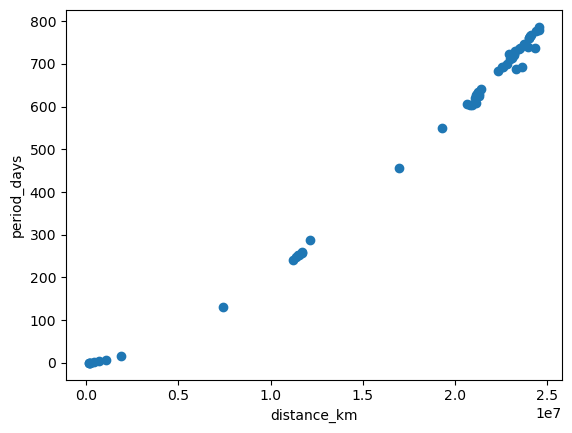

In [84]:
test.plot("distance_km", "period_days")

A useful classifaction of the moons, which differ substantially in radius, orbital period, among other characteristics, is the grouping given in the 'group' column. 

As such, included in the Moons class is a grouped_data attribute, a list of DataFrames each containing group-sepcific data. 

Ananke, Carme, Galilean, Hamilia, Himalia, Inner, Pasiphae, other are the respective group names and are included in the list in that order. (corresponding to indexes 0 through to 7). One note is that the group column itself has been removed from each DataFrame. 

From this list, group-specific trends could be calculated, using standard pandas DataFrame methods. 

For example, the Carme group:

In [99]:
test.grouped_data[6]

,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
moon,,,,,,,,
Aoede,761.0,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.0
Autonoe,719.0,23039000.0,2.0,22.0,NaN,Pasiphae,0.334000,153.0
Callirrhoe,787.0,24583090.0,4.8,20.8,NaN,Pasiphae,0.309570,148.0
Cyllene,738.0,24349000.0,1.0,23.2,NaN,Pasiphae,0.319000,149.0
Eurydome,723.0,23214490.0,1.5,22.7,NaN,Pasiphae,0.297537,150.0
Hegemone,740.0,23947000.0,1.5,22.8,NaN,Pasiphae,0.328000,155.2
Kore,779.0,24543000.0,1.0,23.6,NaN,Pasiphae,0.325000,145.0
Megaclite,747.0,23736190.0,3.0,21.7,NaN,Pasiphae,0.410217,143.0
Pasiphae,722.0,23208940.0,28.9,16.9,NaN,Pasiphae,0.611016,153.0


In [86]:
grouped_mean_errors = test.grouped_data[4].sem(numeric_only = True, skipna = True)
grouped_means = test.grouped_data[4].mean(numeric_only = True)
grouped_means

grouped_percents = (grouped_mean_errors / grouped_means) * 100

grouped_percents

period_days         2.524296
distance_km         1.116335
radius_km          58.487456
mag                 7.316407
mass_kg                  NaN
ecc                10.078760
inclination_deg     1.875119
dtype: float64

<Axes: xlabel='period_days', ylabel='distance_km'>

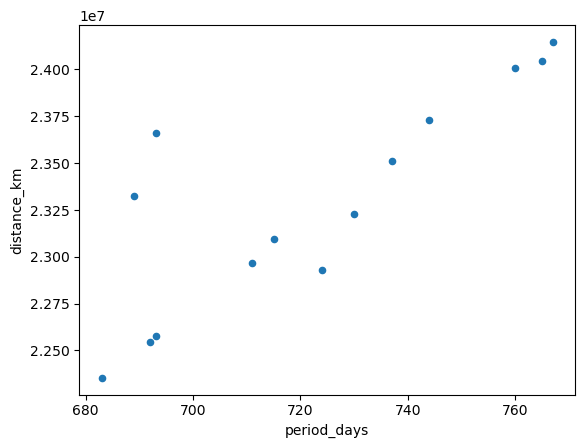

In [95]:
test.grouped_data[1].plot.scatter("period_days", "distance_km")
#test.grouped_data[2]

C:\Users\isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


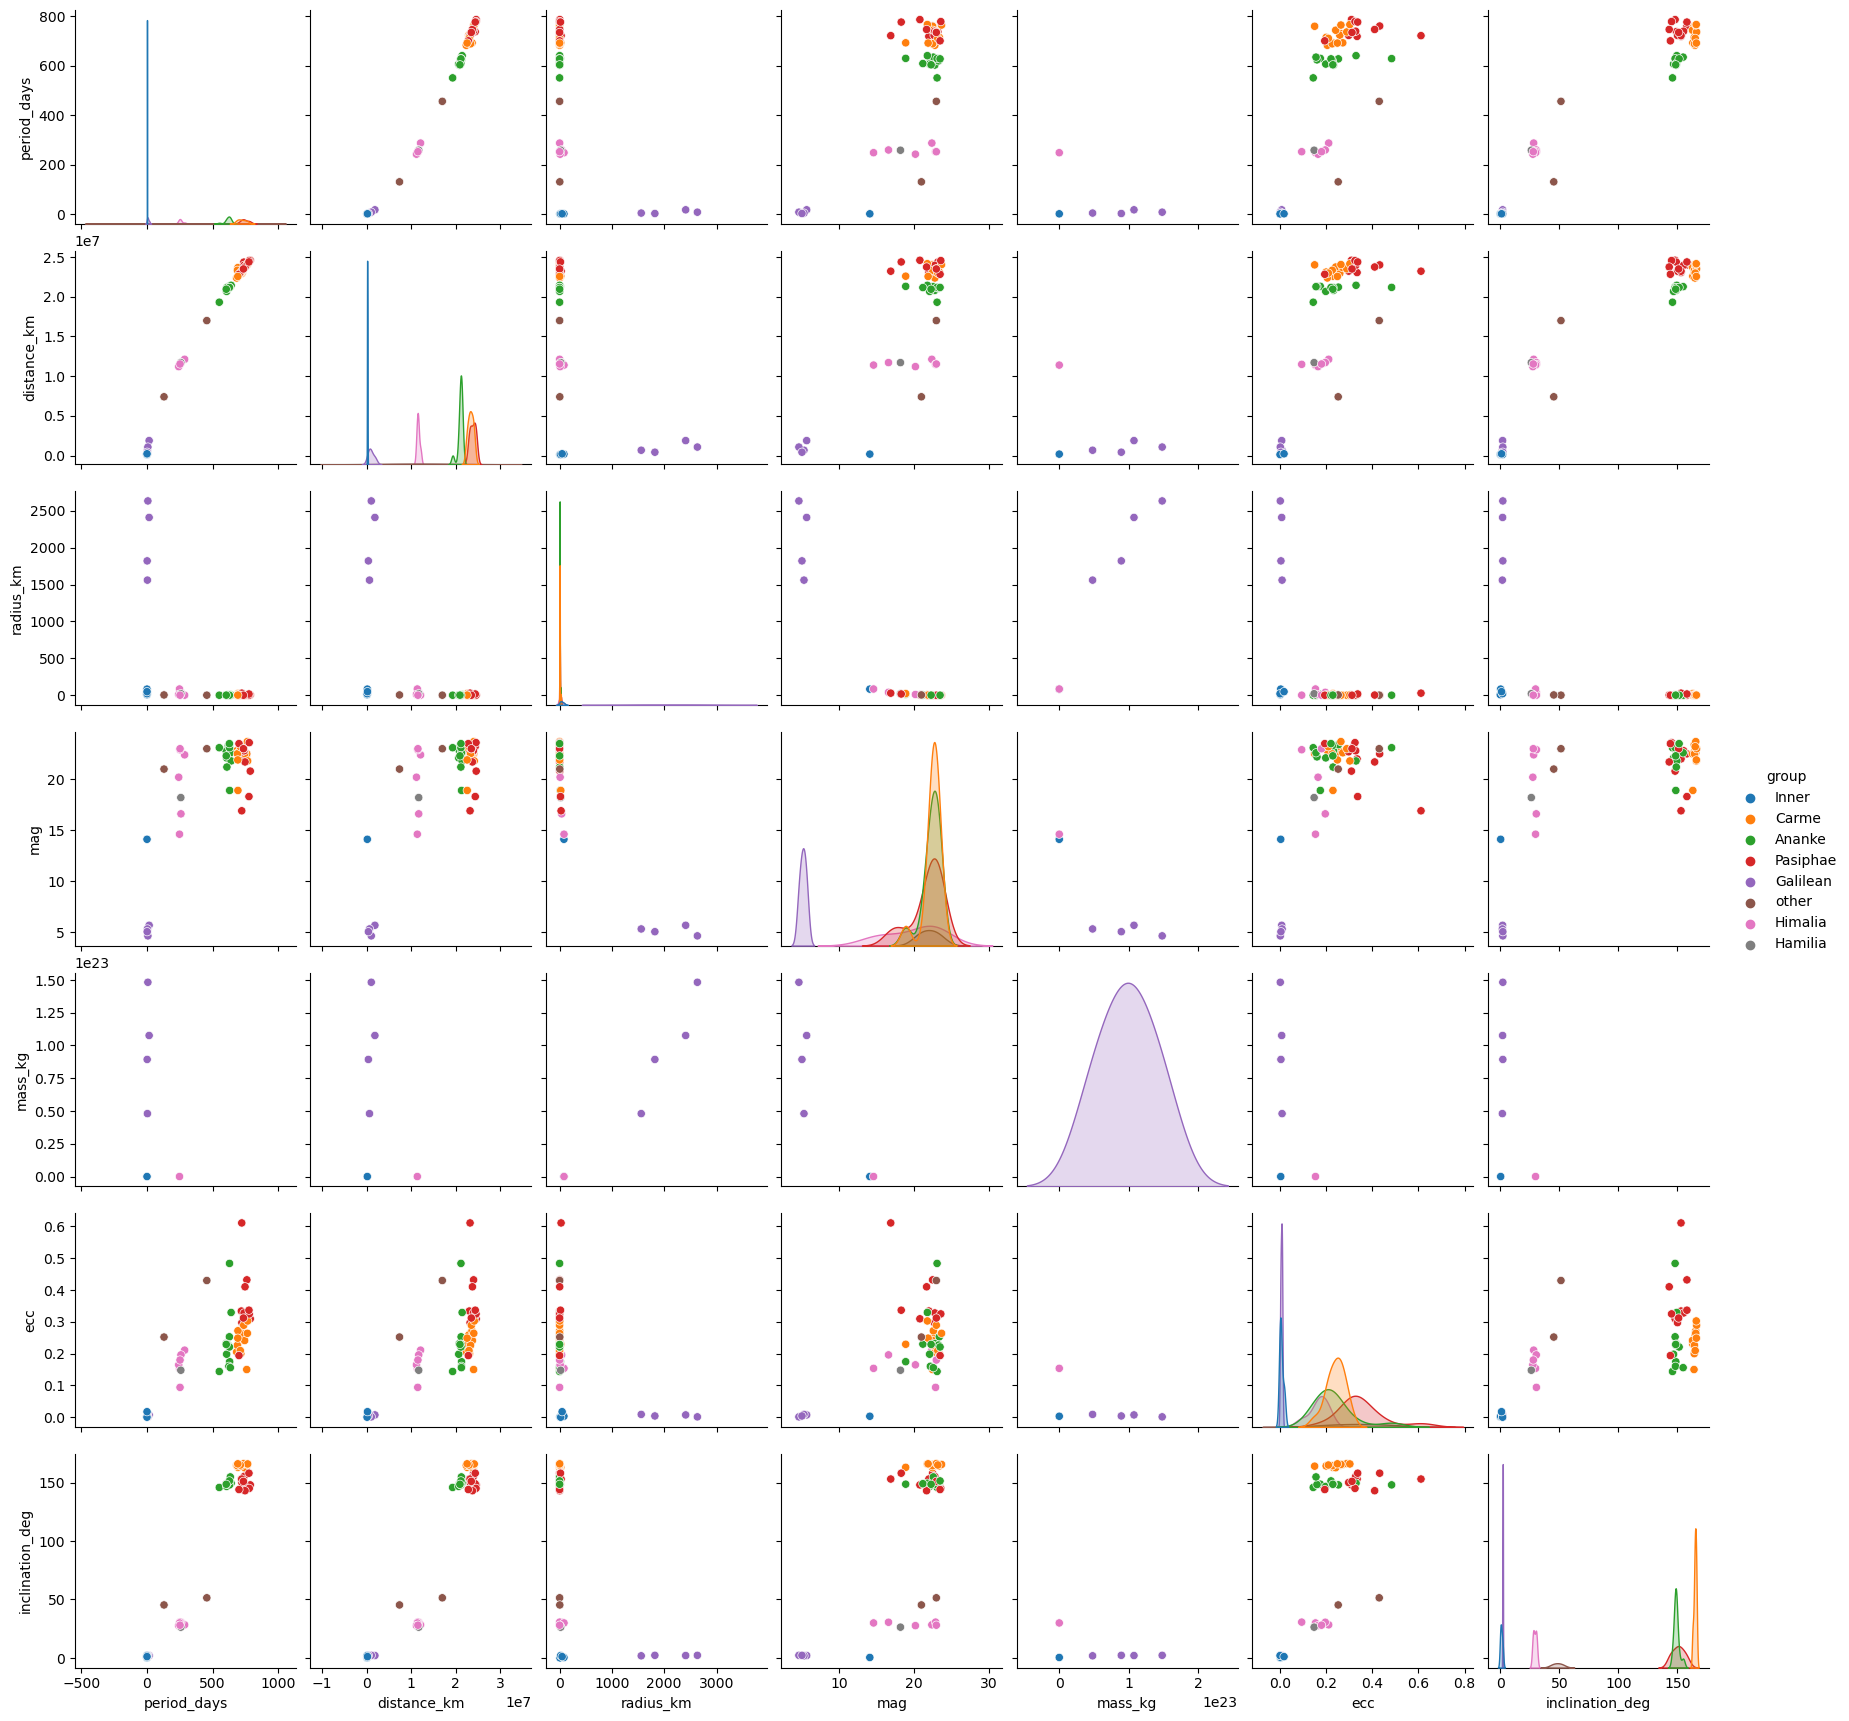

In [97]:
import seaborn as sns

sns.pairplot(test.data, hue = 'group')

Task 2

T^2
4
π
2
G
M
a
3
,

a = distance_km

T = period_days (in seconds)

T^2  = (4(pi^2))/GM * a^3

In [78]:
import numpy as np

G = 6.67e-11

moons_class = Moons()